In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time

In [2]:
norm_v = np.linspace(-4,4,100)

In [3]:
# define variables
hbar = 1
k = 1
Gamma = 1
sat_ratio = 1 #saturation ratio, assume I_L/I_S=1

In [4]:
# define detuning delta for differet gamma

Delta = -Gamma/2 #delta is freq of laser - freq of atomic transition, can play around

# Equations

Recall scattering force is 

$F_{scattering}=\hbar k \frac{\Gamma}{2} \frac{I_L/I_S}{1+I_L/I_S+4\Delta^2/\Gamma^2}$

where $\Delta=\omega_L - \omega_a$.

With doppler effect, this becomes

$F_{scattering}=\hbar k \frac{\Gamma}{2} \frac{I_L/I_S}{1+I_L/I_S+4(\Delta\pm kv)^2/\Gamma^2}$

depending on the freq increase or decrease due to doppler shifts

In [5]:
# eqn of scattering force F_scattering from right laser
F_right = [-hbar*k*Gamma/2*sat_ratio/(1+sat_ratio+(4*(Delta+k*i)**2/Gamma**2)) for i in norm_v]

In [6]:
# eqn of scattering force F_scattering from right laser
F_left = [+hbar*k*Gamma/2*sat_ratio/(1+sat_ratio+(4*(Delta-k*i)**2/Gamma**2)) for i in norm_v]

In [7]:
# normalize force to unity
F_right_normed = [-i/np.min(F_right) for i in F_right]
F_left_normed = [i/np.max(F_left) for i in F_left]
F_net_normed = np.add(F_left_normed,F_right_normed)

In [8]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

# 250529 Nice latex font for thesis

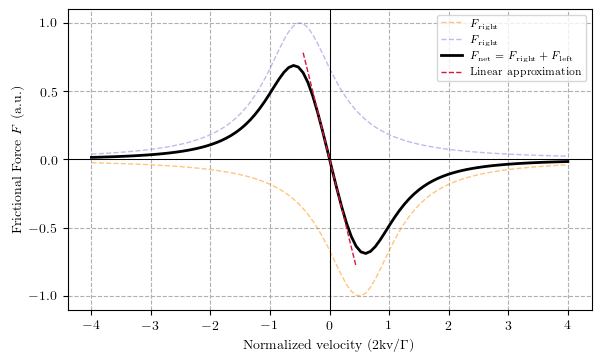

In [9]:
plt.plot(norm_v,F_right_normed,'--',alpha=0.5,color="darkorange",label=r'$F_{\mathrm{right}}$')
plt.plot(norm_v,F_left_normed,'--',alpha=0.5,color="mediumpurple",label=r'$F_{\mathrm{right}}$')
plt.plot(norm_v,F_net_normed,'-',linewidth=2,color="black",label=r'$F_{\mathrm{net}}=F_{\mathrm{right}}+F_{\mathrm{left}}$')
plt.yticks(np.arange(-1, 1.5, step=0.5))

plt.ylabel(r'Frictional Force $F$ (a.u.)')
plt.xlabel(r'Normalized velocity (2kv/$\Gamma$)')

plt.axhline(0.0,linestyle='-',linewidth=0.75,color='black')
plt.axvline(0,linestyle='-',linewidth=0.75,color='black')
# plt.axvline(0.0,0.025,0.975,linestyle='-',color='black')

# Calculate the gradient (slope) around the center (v=0) using central difference
center_idx = len(norm_v) // 2
dv = norm_v[1] - norm_v[0]
slope = (F_net_normed[center_idx + 1] - F_net_normed[center_idx - 1]) / (2 * dv)

# Linear fit: y = slope * (v - v0) + F_net_normed[center_idx]
v0 = norm_v[center_idx]
linear_fit = slope * (norm_v - v0) + F_net_normed[center_idx]

plt.plot(norm_v[44:56], linear_fit[44:56], '--', color='crimson', linewidth=1, label='Linear approximation')

# plt.title(r'Normalized frictional force $F$ against velocity, $\Delta=-\Gamma/2$')
plt.legend()

plt.savefig('250529 DopplerCoolingPlot.pdf',dpi=300)

# plt.show()